In [1]:
# Let's use our visualization we made in the last exercise. 
# First we'll load in the data as usual. The rest of the code is the same exact code as before.

# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


c:\Users\sande\anaconda3\envs\my_learnings\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import seaborn as sns #first you need to install seaborn in your environment



In [3]:
#we  will only use gonna use previous example

# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])


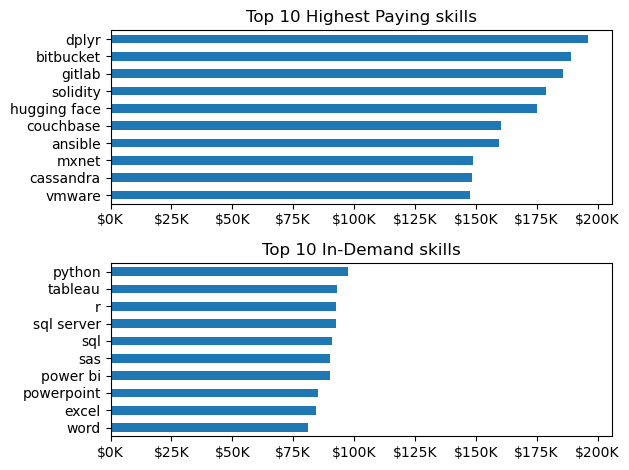

In [4]:
df_DA_US = df_DA_US.explode('job_skills')

df_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False).head(10)

df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False).head(10).sort_values(by='median', ascending=False)

fig, ax = plt.subplots(2,1)

#Top 10 Highest Paying skills

df_top_pay[::-1].plot(kind='barh',y='median',ax=ax[0],legend=False)
ax[0].set_title('Top 10 Highest Paying skills')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))

#Top 10 Most In-Demand Skills for Data Analyst

df_DA_skills[::-1].plot(kind='barh',y='median',ax=ax[1],legend=False)
ax[1].set_title('Top 10 In-Demand skills')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()


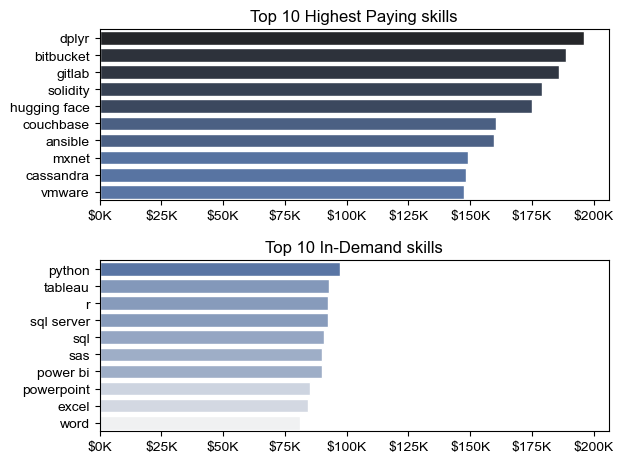

In [5]:
#Doing same plot but with SEABORN

fig, ax = plt.subplots(2,1)

#Top 10 Highest Paying skills

#df_top_pay[::-1].plot(kind='barh',y='median',ax=ax[0],legend=False)
sns.set_theme(style='ticks') #it adjust the background of the plot. we did ticks. you can find out more on thier webside API section

sns.barplot(data=df_top_pay,x='median',y=df_top_pay.index,ax=ax[0],hue='median',palette='dark:b_r')  #we are using seaborn here.

ax[0].set_title('Top 10 Highest Paying skills')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].legend().remove()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))

#Top 10 Most In-Demand Skills for Data Analyst

#df_DA_skills[::-1].plot(kind='barh',y='median',ax=ax[1],legend=False)

sns.barplot(data=df_DA_skills,x='median',y=df_DA_skills.index,ax=ax[1],hue='median',palette='light:b') #plotting using seaborn

#hue lets you to choose the column that you want to apply colour schems. palette lets you to choose the color you want to apply on that coloumn
#in above top paying skills in pallet you did dark: b_r meanns color is dark blue _r for reverse color gradient means it will plot form dark to light
#shade

ax[1].set_title('Top 10 In-Demand skills')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].legend().remove()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()


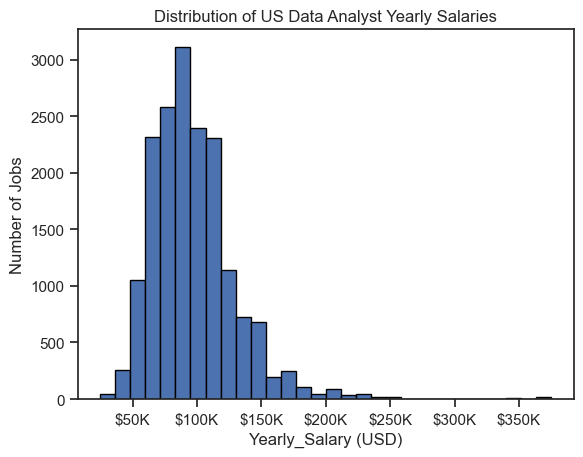

In [6]:
df_DA_US['salary_year_avg'].plot(kind='hist',bins=30,edgecolor='black')

plt.title('Distribution of US Data Analyst Yearly Salaries')
plt.xlabel('Yearly_Salary (USD)')
plt.ylabel('Number of Jobs')

ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.show()


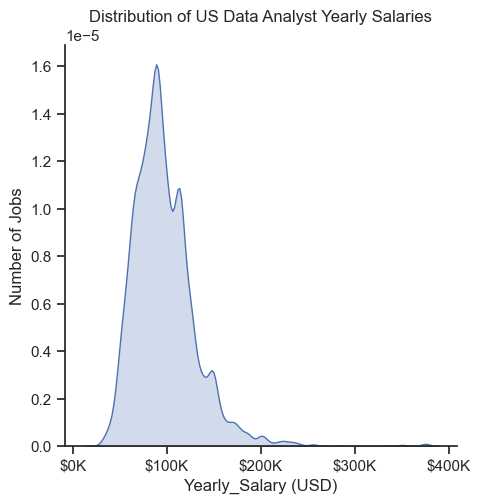

In [7]:
#TO get smooter curve use seaborns .displot() function

#same ex but ploting using seaborn. Well seaborn does have histplot but we want smooth curve so we will use .displot() function
#we can provide data = dataframe, x= , y=,but you can directly give the column of interest so you avoid giving x & y seperately. 
# then kind= 'kde' this will make outer line smooth, and fill will add colour into it.
#since you have already applied the them you don't need to do it here again. it will apply automatically here.

sns.displot(df_DA_US['salary_year_avg'],kind='kde',fill=True)  
 
plt.title('Distribution of US Data Analyst Yearly Salaries')
plt.xlabel('Yearly_Salary (USD)')
plt.ylabel('Number of Jobs')

ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.show()


C:\Users\sande\AppData\Local\Temp\ipykernel_8536\2225878524.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


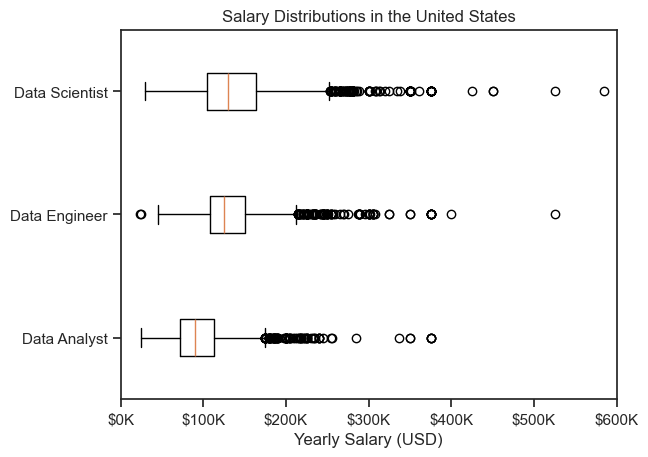

In [8]:
#now lets plot box plot. 

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter for the job titles and country
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

# list of salaries for each job title
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()


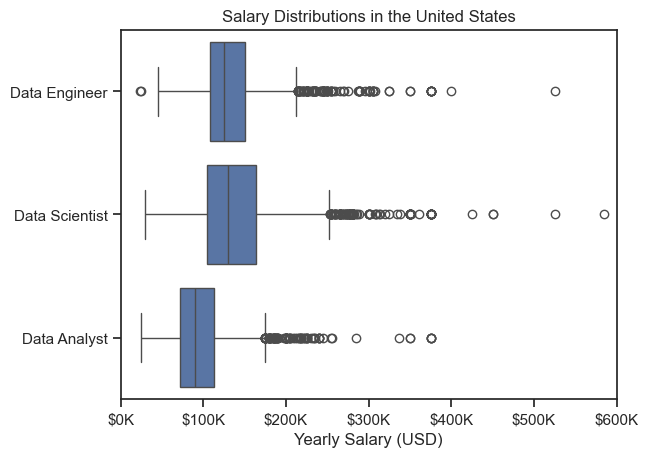

In [9]:
#while plotting with seaborn in box plot you need to give the data frame name and x & y cloumn and it will automatically plot the results.

sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')
sns.set_theme(style='ticks') 

# this is all the same
plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()
